# Predicting classes with the help of KNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

D:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dataframe = pd.read_csv('Classified Data', index_col=0)

In [3]:
dataframe.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
#Making data into standard scaller, because featrures values has different Units.



# Standardize the Variables

In [5]:
#Because KNN calculates distance between points  so its necessory that all features must have standard scaling.

from sklearn.preprocessing import StandardScaler

stdScaler =StandardScaler()

stdScaler.fit(dataframe.drop(['TARGET CLASS'], axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [6]:
std_scaled_features = stdScaler.transform(dataframe.drop('TARGET CLASS', axis=1))

In [7]:
std_scaled_features #will be using for train test split

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [8]:
df_features = pd.DataFrame(data=std_scaled_features, columns=dataframe.columns[:-1])

In [9]:
df_features.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [10]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(std_scaled_features, dataframe['TARGET CLASS'], test_size = 0.30)

In [11]:
X_train.shape, X_test.shape

((700, 10), (300, 10))

# Using KNN

In [12]:
#Now we will use KNN to predict the class.
from sklearn.neighbors import KNeighborsClassifier
knnc = KNeighborsClassifier(n_neighbors=1)
knnc.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [13]:
y_predicted = knnc.predict(X_test)

# Predictions and Evaluations
Evaluating KNN model

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
knn_performance = confusion_matrix(y_test,y_predicted)

In [15]:
print(knn_performance)

[[130  16]
 [  9 145]]


In [16]:
report = classification_report(y_test, y_predicted)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       146
           1       0.90      0.94      0.92       154

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



# Choosing a correct K Value

In [17]:
# Note as K neighbour value increase the error rate will get reduce.
#So now we will run a loop which will have a list of n_negihbour number. in order to trance and get the perfect model.
error_list = []
for k_neig in range(1, 40):
    knnc = KNeighborsClassifier(n_neighbors=k_neig)
    knnc.fit(X_train, y_train)
    y_predicted = knnc.predict(X_test)
    error_list.append(np.mean(y_predicted != y_test))

Text(0, 0.5, 'Error Rate')

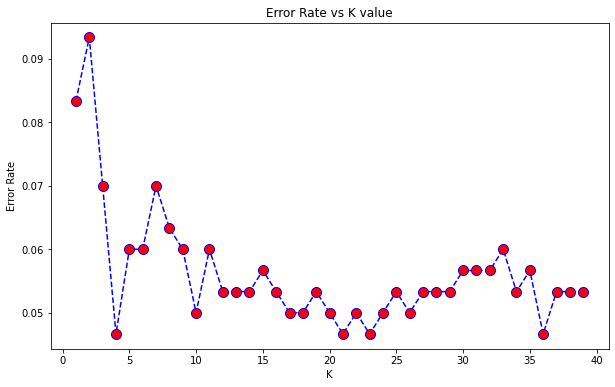

In [20]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_list, color='blue', linestyle = 'dashed', marker = 'o', markerfacecolor='r', markersize =10)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [21]:
# after analysing above graphe that we come to know that at k = 12 , the error rate is between 0.05 to 0.06 is more constant.
# so we will select k = 12 and then we will check the accuracy.


In [23]:
# k=12 i,e neighbors

knnc = KNeighborsClassifier(n_neighbors=12)
knnc.fit(X_train, y_train)
i_predict = knnc.predict(X_test)

# will checkk the perfromance of it

performance = confusion_matrix(y_test, i_predict)
print(performance)

report = classification_report(y_test, y_pred=i_predict)
print(report)


[[135  11]
 [  5 149]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       146
           1       0.93      0.97      0.95       154

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

